# Probability & Statistics 2

## Readings
Read through TS Ch. 3-4 in order to understand the concepts of

* probability mass function (PMF)
* normalization
* "class size paradox"
* cumulative distribution function (CDF)
* percentiles
* median
* interquartile range
* replacement (sampling)

You should ignore the ThinkStats-specific code fragments, but understand how to do the same thing using numpy and scipy stats functions.

## TS Exercise 3.1 (adapted) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample. 

* For this exercise, we will need to use the NUMKDHH attribute from the 2013-2015 Respondent data set. To save you some time, the NUMKDHH column has been extracted (using the unix "cut" command) into a file that you can download from the course website. 

* Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household. It is recommended that you do NOT use the Counter data structure in Python to do this. Since the number of children in a family are integers that range from 0 to 5, you can use an array to store their counts or probabilities (and use the index to implicitly represent the number of children).

* Normalize the distribution into a probabily mass function (that sums to one). Each entry in the dictionary will represent the probability $P(i)$ where $i$ is the number of children in the family.

* Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household. The way to think about this is: 

  1. we randomly pick a child and ask the child how many children are in his/her family (we assume the child will answer truthfully); 
  2. Suppose our sample consists of $n$ children. Now we count/calculate the number of children in our sample that will answer 1, 2, 3, ... etc. 
  3. Since the sample is a (uniform) random sample of the NUMKDHH PMF, the number of children answering $i$ will be $n \cdot P(i)$
  4. Now find the PMF of the sample

* Plot the actual and biased distributions (you might find that seaborn.distplot is not so convenient in this case), and compute their means.

[ 0.49061239  0.20073697  0.17845236  0.09036673  0.02982979  0.01000175]
[ 0.          0.20112518  0.35759494  0.27162447  0.11954993  0.05010549]
m1 = 0.998069836813
m2 = 2.45991561181


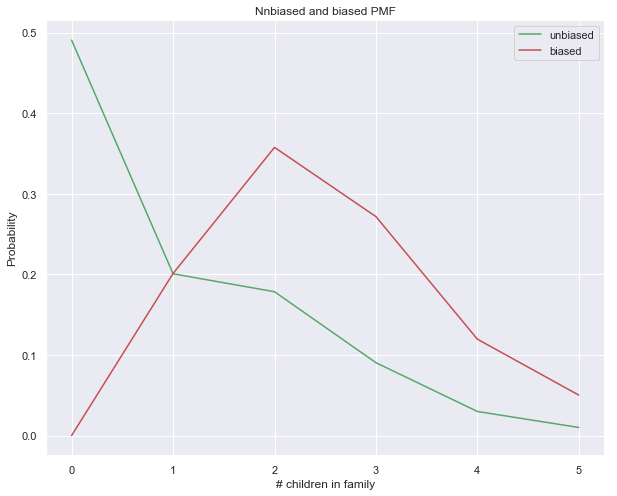

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import pprint
from collections import Counter

sns.set(color_codes=True)

fname = 'numkdhh.txt'

with open(fname) as file:
    numkdhh = [int(x) for x in file.readlines()]

dist = np.zeros(6)

for x in numkdhh:
    dist[x]+=1

m1 = 0.0
for i in range(6):
    dist[i] /= len(numkdhh)
    m1 += i*dist[i]

print(dist)

biasdist = np.zeros(6)
total=0.0
for i in range(6):
    biasdist[i] = dist[i] * i
    total += biasdist[i]

m2 = 0.0
for i in range(6):
    biasdist[i] /= total
    m2 += i*biasdist[i]

print(biasdist)

print('m1 = ' + str(m1))
print('m2 = ' + str(m2))

plt.rcParams['figure.figsize'] = [10, 8]


plt.plot(range(6), dist, 'g',label='unbiased')
plt.plot(range(6), biasdist,'r', label='biased')
plt.xlabel("# children in family")
plt.ylabel("Probability")
plt.title("Nnbiased and biased PMF")
plt.legend()
plt.show()


Try to make sense of the paradox. What resulted in the difference in the two means?

You can also take a look at this [blog](https://owenbiesel.com/2017/03/01/the-class-size-paradox/)